In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [27]:
class AgentState(TypedDict):
    """Define the state of the agent."""
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    result1: int
    result2: int

In [28]:
def adder_node1(state: AgentState) -> AgentState:
    """Add two numbers."""
    state.result1 = state.number1 + state.number2
    return state

def adder_node2(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state.result2 = state.number3 + state.number4
    return state

def subtractor_node1(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state.result1 = state.number1 - state.number2
    return state

def subtractor_node2(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state.result2 = state.number3 - state.number4
    return state

In [34]:
def router1(state: AgentState) -> AgentState:
    """Route based on the operation."""
    if state["operation"] == "add":
        return "adder_node1"
    elif state["operation"] == "subtract":
        return "subtractor_node1"
    else:
        raise ValueError("Unknown operation")
    

def router2(state: AgentState) -> AgentState:
    """Route based on the operation."""
    if state.operation == "add":
        return "adder_node2"
    elif state.operation == "subtract":
        return "subtractor_node2"
    else:
        raise ValueError("Unknown operation")

In [30]:
g = StateGraph(AgentState)

g.add_node("router1", lambda state: state)
g.add_node("adder_node1", adder_node1)
g.add_node("subtractor_node1", subtractor_node1)

g.add_node("router2", lambda state: state)
g.add_node("adder_node2", adder_node2)
g.add_node("subtractor_node2", subtractor_node2)

g.add_edge(START, "router1")

g.add_conditional_edges(
    "router1",
    router1,
    {
        "adder_node1": "adder_node1",
        "subtractor_node1": "subtractor_node1",
    },
)
g.add_edge("adder_node1", "router2")
g.add_edge("subtractor_node1", "router2")

g.add_conditional_edges(
    "router2",
    router2,
    {
        "adder_node2": "adder_node2",
        "subtractor_node2": "subtractor_node2",
    },
)
g.add_edge("adder_node2", END)
g.add_edge("subtractor_node2", END)

app = g.compile()

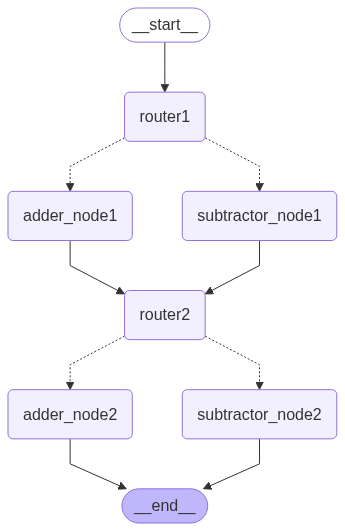

In [31]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
state_1 = AgentState(
    number1=5,
    number2=3,
    number3=10,
    number4=2,
    operation="add"
)
state_2 = AgentState(
    number1=5,
    number2=3,
    number3=10,
    number4=2,
    operation="subtract"
)

In [35]:
result = app.invoke(state_1)

AttributeError: 'dict' object has no attribute 'operation'